In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, cross_val_predict


In [5]:

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/personality_datasert.csv')
df['Drained_after_socializing'] = pd.Series(map(lambda x: x == 'Yes', df['Drained_after_socializing']))
df['Stage_fear'] = pd.Series(map(lambda x: x == 'Yes', df['Stage_fear']))
df['Personality'] = pd.Series(map(lambda x: x == 'Extrovert', df['Personality']))
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,False,4.0,6.0,False,13.0,5.0,True
1,9.0,True,0.0,0.0,True,0.0,3.0,False
2,9.0,True,1.0,2.0,True,5.0,2.0,False
3,0.0,False,6.0,7.0,False,14.0,8.0,True
4,3.0,False,9.0,4.0,False,8.0,5.0,True
...,...,...,...,...,...,...,...,...
2895,3.0,False,7.0,6.0,False,6.0,6.0,True
2896,3.0,False,8.0,3.0,False,14.0,9.0,True
2897,4.0,True,1.0,1.0,True,4.0,0.0,False
2898,11.0,True,1.0,3.0,True,2.0,0.0,False


In [6]:
X = df.drop('Personality', axis=1)
y = df['Personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = Pipeline(steps=[
    # Ligeiramente melhor sem o StandardScaler
    # ('scaler', StandardScaler()),
    ('logit_reg', LogisticRegression())
])

y_pred_cv = cross_val_predict(classifier, X_train, y_train, cv=5)

print("=== MÉTRICAS NA VALIDAÇÃO CRUZADA (conjunto de treino) ===")
print(f"Acurácia:  {accuracy_score(y_train, y_pred_cv):.4f}")
print(f"Precisão:  {precision_score(y_train, y_pred_cv):.4f}")
print(f"Recall:    {recall_score(y_train, y_pred_cv):.4f}")
print(f"F1-Score:  {f1_score(y_train, y_pred_cv):.4f}")
print()


=== MÉTRICAS NA VALIDAÇÃO CRUZADA (conjunto de treino) ===
Acurácia:  0.9284
Precisão:  0.9331
Recall:    0.9268
F1-Score:  0.9300



=== MÉTRICAS FINAIS (conjunto de teste) ===
              precision    recall  f1-score   support

   Introvert   0.914894  0.928058  0.921429       278
   Extrovert   0.932886  0.920530  0.926667       302

    accuracy                       0.924138       580
   macro avg   0.923890  0.924294  0.924048       580
weighted avg   0.924262  0.924138  0.924156       580



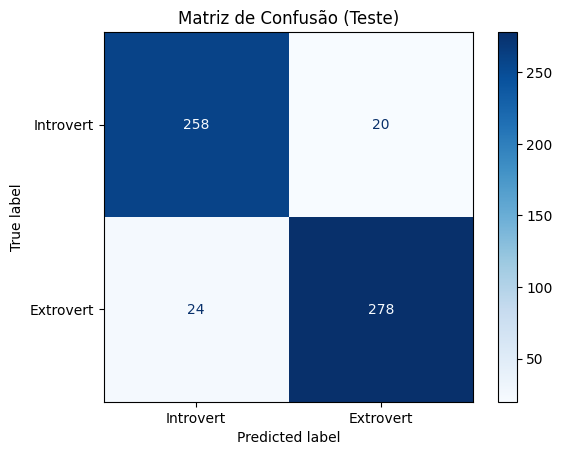

In [11]:
classifier.fit(X_train, y_train)
y_pred_test = classifier.predict(X_test)

print("=== MÉTRICAS FINAIS (conjunto de teste) ===")
print(classification_report(y_test, y_pred_test, target_names=['Introvert', 'Extrovert'], digits=6))

# === 6. Matriz de confusão ===
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Introvert', 'Extrovert'], )
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão (Teste)")
plt.show()